<a href="https://colab.research.google.com/github/Sushil211/Auto-Encoder-and-GAN/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

from tensorflow.keras.layers import Input, Dense, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
adam = Adam(lr=2e-4,beta_1=0.5)

In [3]:
noise_size = 30

X = x_train.astype(float) / 255
X_test = x_test.astype(float) / 255

In [4]:
#Generator
in_layer = Input(shape=(noise_size,))

dense = Dense(units=100, activation="tanh")(in_layer)
dense = Dense(units=400, activation="tanh")(dense)
dense = Dense(units=784, activation="sigmoid")(dense)

out_layer = Reshape(target_shape=(28,28))(dense)

In [5]:
generator = Model(in_layer, out_layer)
generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense (Dense)                (None, 100)               3100      
_________________________________________________________________
dense_1 (Dense)              (None, 400)               40400     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               314384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 357,884
Trainable params: 357,884
Non-trainable params: 0
_________________________________________________________________


In [6]:
generator.compile(optimizer=adam, loss="binary_crossentropy")

In [7]:
#Discriminator
in_layer = Input(shape=(28,28))
reshape = Reshape(target_shape=(784,))(in_layer)

dense = Dense(units=400, activation="tanh")(reshape)
dense = Dense(units=100, activation="tanh")(dense)
dense = Dense(units=10, activation="tanh")(dense)

out_layer = Dense(units=1, activation="sigmoid")(dense)

In [8]:
discriminator = Model(in_layer, out_layer)

In [9]:
discriminator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 355,121
Trainable params: 355,121
Non-trainable params: 0
_____________________________________________________

In [11]:
discriminator.compile(optimizer=adam, loss="binary_crossentropy")

In [12]:
in_layer = Input(shape=noise_size,)
gen_layer = generator(in_layer)
disc_layer = discriminator(gen_layer)

In [13]:
gan = Model(in_layer, disc_layer)
gan.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
model (Model)                (None, 28, 28)            357884    
_________________________________________________________________
model_1 (Model)              (None, 1)                 355121    
Total params: 713,005
Trainable params: 713,005
Non-trainable params: 0
_________________________________________________________________


In [14]:
gan.compile(optimizer=adam, loss="binary_crossentropy")

In [15]:
def display(images):
    plt.figure(figsize=(5, 5))
    for i in range(1, 26):
        plt.subplot(5, 5, i)
        plt.imshow(images[i], cmap="gray")
    plt.show()

0


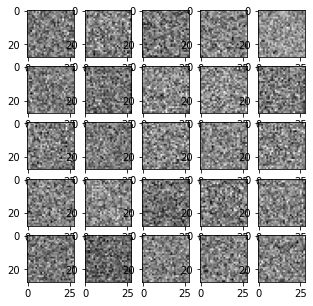

100


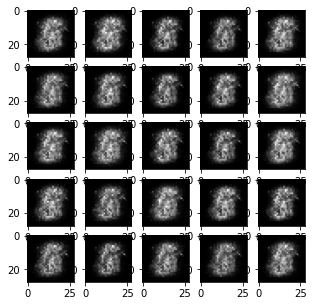

200


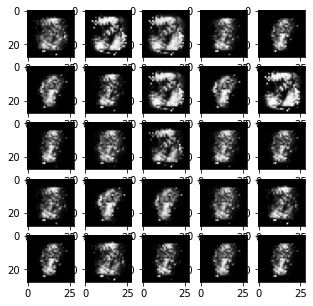

300


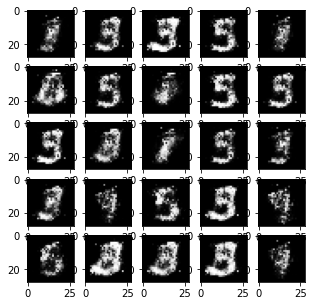

400


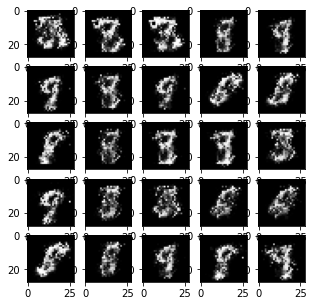

500


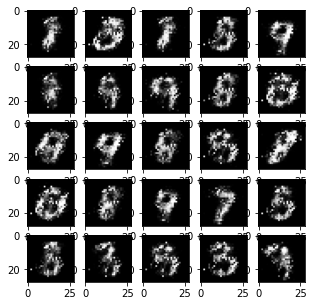

600


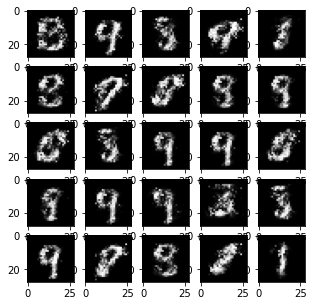

700


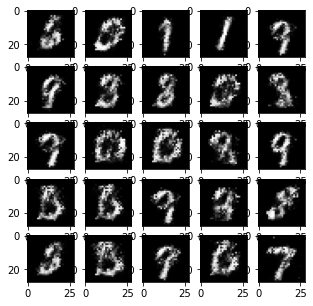

800


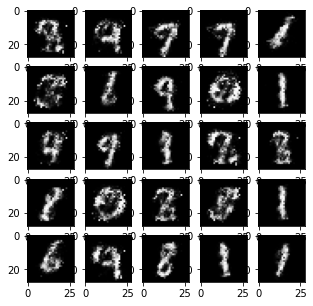

900


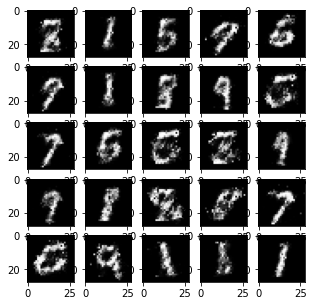

In [16]:
for i in range(1000):
    noise = np.random.randn(1000, noise_size)
    fake_images = generator.predict(noise)

    real_images = X[np.random.randint(0, len(X), 1000)]

    discriminator.trainable = True

    discriminator.fit(fake_images, np.zeros([1000]), verbose=0)
    discriminator.fit(real_images, np.ones([1000]) * .9, verbose=0)

    discriminator.trainable = False

    noise = np.random.randn(1000, noise_size)
    gan.fit(noise, np.ones([1000]) * .9, verbose=0)
    
    if i % 100 == 0:
        print(i)
        display(fake_images)